# CS210 - Homework #1: Spotify Playlist Analysis
Filiz İpek Oktay/30780

Exploratory Data Analysis is a fundamental process in the field of data science that helps us gain insights into a dataset by summarizing its main characteristics and identifying patterns and relationships within the data. In this assignment, we will be applying exploratory data analysis techniques to a Spotify playlist to better understand the characteristics of the songs in the playlist. Through this exercise, we will learn scraping, visualize distributions, and uncover insights that can help us make informed decisions about the playlist's content and structure. Whether you are a music lover, aspiring data scientist, or simply interested in exploring the power of data, this assignment will provide you with a hands-on experience in exploratory data analysis that you can apply to any dataset. **You have unlimited freedom to use ChatGPT for this assignment, and we recommend it. Please do not forget to save your ChatGPT chats. Do not use different chats, and do not delete your chat history after you complete the assignment. Besides your notebook, you must also submit for your ChatGPT chat links.**


**In this homework, we offer you 2 ways to get data.**

1 - In this assignment, you will analyze a playlist, and this playlist is available as a table on a website. You can scrape the table from this website, we provide HTML content for this. There is a possibility to retrieve the data using BeautifulSoup. You can also get the table directly from the URL using Selenium, and this way will probably be easier. The homework will start with this part and if you successfully capture the data and use it in the homework, you will start with 25 points.

2 - If you do not want to deal with scraping, we will also provide you with the CSV version of the dataset, and you can use it directly. In this case, naturally you will not have completed the scraping part, but you will still be able to complete the remaining parts of the assignment, and you will not receive any points for the scraping part.




Below, you can find all the set of features, provided in the dataset:

1. **Song:** The name of the track.
2. **Artist:** The name of the artist or group that performed the song.
3. **Popularity:** A numerical measure of the song's popularity.
4. **BPM (Beats Per Minute):** The tempo or speed of the song in beats per minute.
5. **Genres:** The musical genres associated with the song.
6. **Parent Genres:** The broader or parent musical genres of the song.
7. **Album:** The name of the album containing the song.
8. **Album Date:** The release date of the album.
9. **Time:** The duration of the song in minutes and seconds.
10. **Dance:** A numerical value indicating danceability.
11. **Energy:** A numerical value representing the energy level of the song.
12. **Acoustic:** A numerical value indicating the acousticness of the song.
13. **Instrumental:** A numerical value indicating the instrumentalness of the song.
14. **Happy:** A numerical value representing the mood or happiness of the song.
15. **Speech:** A numerical value indicating the presence of speech or lyrics in the song.
16. **Live:** Indicates if the song is a live recording (1 for live, 0 for studio).
17. **Loud:** A numerical value indicating the loudness of the song.
18. **Key:** The musical key in which the song is composed.
19. **Time Signature:** The time signature of the song.
20. **Added At:** The date or timestamp when the song was added to the dataset.
21. **Spotify Track Id:** Unique identifiers assigned to each track by Spotify.
22. **Album Label:** The name of the record label associated with the album.
23. **Camelot:** Information about the musical key or tonal center of the song.
24. **Spotify Track Img:** URLs or references to images associated with the Spotify tracks.


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bs4 
import requests

## Q1: Scraping  (25 points)

If you want to scrape the playlist, you can retrieve the data using [this playlist analyzer website](https://www.chosic.com/spotify-playlist-analyzer/?plid=4wyQnWDDys6T8A2ni96VfG). Here, you should take the Playlist Table, which contains the songs' information, and convert it to DataFrame. As we mentioned at the beginning of the assignment, using Selenium may be a more logical solution since the content of the site is dynamic. But you are also free to use BeautifulSoup, or read the file directly and start data analysis. If you want to use BeautifulSoup, we provided the static version of the webpage. 

In [68]:
#SCRAPING WAY - 25 POINTS
with open('CS210 - Homework 1 - for BeautifulSoup.html', 'r', encoding='utf-8') as file:
    html_content = file.read()
soup = bs4.BeautifulSoup(html_content, "html.parser")


import pandas as pd

allData1 = soup.find("table", {"class" : "info-table"}).find("thead").findAll("th")
allData2 = soup.find("table", {"class" : "info-table"}).find("tbody").findAll("tr")

allSongs = []
allDataT = []
songs = []

for data1 in allData1:
    allDataT.append(data1.get_text())
    

for data2 in allData2: #for every song
    eachRow = []
    myDict = {}
    dataTd = data2.findAll("td")
    for i in dataTd:
        eachRow.append(i.get_text())
    songs.append(eachRow)

for i in songs: 
    myDict = {}
    for j in allDataT:
        myDict[j] = i[allDataT.index(j)]
    allSongs.append(myDict)


df = pd.DataFrame(allSongs)

columns_to_convert = ['Popularity', 'BPM', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live', 'Time Signature']  # Add column names that you want to convert to integers
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce', downcast='integer')

# Convert to int64
df[columns_to_convert] = df[columns_to_convert].astype('int64', errors='ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df


,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,Dance,Energy,Acoustic,Instrumental,Happy,Speech,Live,Loud,Key,Time Signature,Added at,Spotify Track Id,Album Label,Camelot
0,1,Crying Lightning,Arctic Monkeys,75,107,"garage rock, modern rock, permanent wave, rock...",Rock,Humbug,2009-08-20,03:44,50,89,1,0,67,0,20,-4 db,E Minor,4,2023-10-11,6wVWJl64yoTzU27EI8ep20,Domino Recording Co,9A
1,2,Buzzcut Season,Lorde,73,111,"art pop, metropopolis, nz pop, pop","Pop, Electronic",Pure Heroine,2013-09-27,04:06,73,62,61,31,25,0,10,-11 db,C♯/D♭ Major,4,2023-10-11,51QEyJI5M7uyd8DOh9tqQY,Universal Music New Zealand Limited,3B
2,3,Ode To The Mets,The Strokes,69,92,"alternative rock, garage rock, modern rock, pe...",Rock,The New Abnormal,2020-04-10,05:51,43,62,34,18,20,0,10,-5 db,C♯/D♭ Minor,4,2023-10-11,1BLOVHYYlH4JUHQGcpt75R,Cult Records/RCA Records,12A
3,4,Instant Crush (feat. Julian Casablancas),"Daft Punk,Julian Casablancas",78,110,"electro, filter house, rock, indie rock","Hip Hop, Electronic, Rock",Random Access Memories,2013-05-20,05:37,78,59,4,62,52,0,0,-10 db,A#/B♭ Minor,4,2023-10-11,2cGxRwrMyEAp8dEbuZaVv6,Columbia,3A
4,5,I Know The End,Phoebe Bridgers,0,111,"indie pop, la indie, pov: indie",Pop,Punisher,2020-06-18,05:44,33,32,32,2,26,0,20,-10 db,C♯/D♭ Major,4,2023-10-11,3cr3oAP4bQFNjZBV7ElKaB,Dead Oceans,3B
5,6,Taro,alt-J,0,172,"indie rock, indietronica, modern alternative r...","Rock, Pop",An Awesome Wave,2012-05-28,05:14,35,48,77,0,29,0,0,-11 db,F Major,4,2023-10-11,36ylLzMtvJ2CItc7bN4TcF,Infectious,7B
6,7,Close Your Eyes,The All-American Rejects,41,92,"alternative metal, modern rock, neo mellow, ne...","Metal, Rock, Folk/Acoustic, Pop",Sweat,2017-07-07,04:27,47,63,7,0,8,0,0,-8 db,C♯/D♭ Major,4,2023-10-11,4HM8tkHTQ6JVSMfsJOrcAW,Interscope,3B
7,8,Hold No Grudge - Bonus Track,Lorde,51,155,"art pop, metropopolis, nz pop, pop","Pop, Electronic",Solar Power (Deluxe Edition),2021-11-05,04:28,66,34,88,0,49,20,0,-13 db,G Major,4,2023-10-11,188rKyWMsC4WsKKZ85lnUO,Universal Music New Zealand Limited,9B
8,9,Balaclava,Arctic Monkeys,63,138,"garage rock, modern rock, permanent wave, rock...",Rock,Favourite Worst Nightmare,2007-04-22,02:51,41,81,0,0,76,0,30,-4 db,B Minor,4,2023-10-11,0ftMOhVfFm5Wbs5sZdEtsC,Domino Recording Co,10A
9,10,Keep On,Portugal. The Man,47,140,"indie rock, indietronica, modern alternative r...","Rock, Pop",Woodstock,2017-06-16,03:23,67,68,25,5,78,0,0,-7 db,C Major,4,2023-10-11,4wnqFGTV4268VQgCG1jn7J,Atlantic Records,8B


In [69]:
#READ THE DATA DIRECTLY - 0 PTS

Spotify Track Img, Song Preview columns may not be in the data we got from scraping, but we will not use these columns. So you can ignore this columns.

## Q2: Exploring the Dataset (35 points)

Since we complete the scraping, we can finally start deep-diving into the dataset. Now, follow the instructions.

In [70]:
#2pts - show the first 3 rows
df.head(3)

,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,Dance,Energy,Acoustic,Instrumental,Happy,Speech,Live,Loud,Key,Time Signature,Added at,Spotify Track Id,Album Label,Camelot
0,1,Crying Lightning,Arctic Monkeys,75,107,"garage rock, modern rock, permanent wave, rock...",Rock,Humbug,2009-08-20,03:44,50,89,1,0,67,0,20,-4 db,E Minor,4,2023-10-11,6wVWJl64yoTzU27EI8ep20,Domino Recording Co,9A
1,2,Buzzcut Season,Lorde,73,111,"art pop, metropopolis, nz pop, pop","Pop, Electronic",Pure Heroine,2013-09-27,04:06,73,62,61,31,25,0,10,-11 db,C♯/D♭ Major,4,2023-10-11,51QEyJI5M7uyd8DOh9tqQY,Universal Music New Zealand Limited,3B
2,3,Ode To The Mets,The Strokes,69,92,"alternative rock, garage rock, modern rock, pe...",Rock,The New Abnormal,2020-04-10,05:51,43,62,34,18,20,0,10,-5 db,C♯/D♭ Minor,4,2023-10-11,1BLOVHYYlH4JUHQGcpt75R,Cult Records/RCA Records,12A


In [71]:
#1pts - show the info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   #                 326 non-null    object
 1   Song              326 non-null    object
 2   Artist            326 non-null    object
 3   Popularity        326 non-null    int64 
 4   BPM               326 non-null    int64 
 5   Genres            326 non-null    object
 6   Parent Genres     326 non-null    object
 7   Album             326 non-null    object
 8   Album Date        326 non-null    object
 9   Time              326 non-null    object
 10  Dance             326 non-null    int64 
 11  Energy            326 non-null    int64 
 12  Acoustic          326 non-null    int64 
 13  Instrumental      326 non-null    int64 
 14  Happy             326 non-null    int64 
 15  Speech            326 non-null    int64 
 16  Live              326 non-null    int64 
 17  Loud            

In [72]:
#2pts - give the statistical summary of numerical columns
df.describe()

,Popularity,BPM,Dance,Energy,Acoustic,Instrumental,Happy,Speech,Live,Time Signature
count,326.00000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000
mean,50.41411,122.990798,54.895706,60.478528,28.245399,13.380368,43.625767,0.858896,12.055215,3.929448
std,23.10292,25.101822,14.852345,20.385164,29.670725,24.219816,22.836027,3.906409,12.615376,0.320467
min,0.00000,66.000000,11.000000,10.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000
25%,40.00000,106.000000,45.000000,45.000000,2.000000,0.000000,26.000000,0.000000,0.000000,4.000000
50%,55.00000,122.500000,55.000000,61.000000,17.000000,0.000000,41.000000,0.000000,10.000000,4.000000
75%,66.00000,138.000000,66.000000,77.000000,51.750000,13.750000,60.000000,0.000000,17.500000,4.000000
max,93.00000,200.000000,89.000000,98.000000,96.000000,95.000000,98.000000,40.000000,80.000000,4.000000


Let's learn more about our dataset. There are various genres in playlists but some of them are more frequent than others. Your task is to determine the top 10 most frequent genres present in the data. Please consider that some songs have multiple genres. And at the end print top 10 genres with their counts.

In [73]:
#5pts

# Split the Genres string by commas
df['Genres'] = df['Genres'].str.split(', ')

# Explode the Genres column
df_exploded = df.explode('Genres')

# Count the occurrences of each genre
genre_counts = df_exploded['Genres'].value_counts()

# Select the top 10 genres
genre_counts.head(10)


Genres
indie rock        113
modern rock       104
art pop            80
rock               74
indie pop          64
chamber pop        58
permanent wave     48
pov: indie         41
indietronica       38
garage rock        37
Name: count, dtype: int64

Let's make the analysis a little more detailed. Specifically, you are required to find and display the top 5 most popular music genres based on their average popularity score, but please only consider genres that appear more than 10 times in the dataset. And at the end print top_genres with their popularity score.

In [74]:
#6pts

genres = []
for song in allSongs:
    myList = song['Genres'].split(',')
    for i in myList:
        genres.append(i.strip())  # Use strip to remove leading/trailing whitespaces

newGen = []
newDict = {}
for j in genres:
    if genres.count(j) > 10 and j not in newGen:
        newGen.append(j)
        newDict[j] = genres.count(j)

sumDict = {}
count = 0
for t in newGen:
    num = 0
    total_songs_with_genre = 0  # New variable to count the total number of songs with the genre
    for song in allSongs:
        tempList = song['Genres'].split(',')
        for i in tempList:
            i = i.strip()  # Strip whitespace from each genre
            if t == i:
                num += int(song['Popularity'])
                total_songs_with_genre += 1
    
    # Corrected the division to use total_songs_with_genre
    sumDict[t] = float(num) / total_songs_with_genre
    count += 1

sorted_sumDict = dict(sorted(sumDict.items(), key=lambda item: item[1], reverse=True))

counter = 0
for genre, count in sorted_sumDict.items():
    counter += 1
    print(counter, '.' ,f"{genre} : {count}")
    if counter == 5:
        break

        



1 . permanent wave : 67.91666666666667
2 . pop : 65.82352941176471
3 . sheffield indie : 65.64516129032258
4 . garage rock : 65.02702702702703
5 . la indie : 62.07692307692308


Our dataset contains lots of technical information about the music. Still, we can create different columns for better information source. In this question, we will apply a pretty basic feature engineering approach. Here you need to categorize the music according to popularity and BPM.There will be two new columns named "Popularity_Category" and "BPM_Category". Let it be "High" if its popularity is above the 75th percentile, "Medium" if it falls between 25 and 75 (inclusive), and "Low" for all the others. For BPM, if it is below 100, call it "Slow", if it is between 100 and 130 (inclusive), call it "Medium", and if it is greater than 130, let it be "Fast". Once the categorization is complete, print the value counts for both 'Popularity_Category' and 'BPM_Category'.

In [75]:
#5pts
#Since the %75 is 66 and %25 is 40
def func(song, allSongs):
    if int(song['Popularity']) > 66:
        song['Popularity_Category'] = "High"
    elif 40 <= int(song['Popularity']) <= 66:
        song['Popularity_Category'] = "Medium"
    else:
        song['Popularity_Category'] = "Low"
    
    if int(song['BPM']) < 100:
        song['BPM_Category'] = "Slow"
    elif 100 <= int(song['BPM']) <= 130:
        song['BPM_Category'] = "Medium"
    else:
        song['BPM_Category'] = "Fast"

        
popList = []
bpmList = []
num = len(allSongs[0])
for song in allSongs:
    func(song, allSongs)
    popList.append(song['Popularity_Category'])
    bpmList.append(song['BPM_Category'])

high = popList.count("High")
medium = popList.count("Medium")
low = popList.count("Low")

slow = bpmList.count("Slow")
medium2 = bpmList.count("Medium")
fast = bpmList.count("Fast")

#printing the values of popularity and BPM categories
print("Popularity_Category")
print("High:" , high)
print("Medium:", medium)
print("Low:", low)

print("\nBPM_Category")
print("Slow:", slow)
print("Medium:", medium2)
print("Fast:", fast)


df = pd.DataFrame(allSongs)


Popularity_Category
High: 79
Medium: 170
Low: 77

BPM_Category
Slow: 59
Medium: 160
Fast: 107


Let's test our filtering skills. Filtering is a significant skill in data science because in many cases you will only need some part of the dataset. In this question, we will filter a song called Crying Lightning by Arctic Monkeys. It's not a song that is arbitrarily chosen by the assistant, you can also take it as a recommendation. :)

In [76]:
#3pts
# Remove leading and trailing whitespaces from the 'Song' column
df['Song'] = df['Song'].str.strip()

# Filter the DataFrame
filtered_df = df[df['Song'].str.lower() == "crying lightning"]
filtered_df


,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,Dance,Energy,Acoustic,Instrumental,Happy,Speech,Live,Loud,Key,Time Signature,Added at,Spotify Track Id,Album Label,Camelot,Popularity_Category,BPM_Category
0,1,Crying Lightning,Arctic Monkeys,75,107,"garage rock, modern rock, permanent wave, rock...",Rock,Humbug,2009-08-20,03:44,50,89,1,0,67,0,20,-4 db,E Minor,4,2023-10-11,6wVWJl64yoTzU27EI8ep20,Domino Recording Co,9A,High,Medium


Let's do a more advanced filtering operation. Display the name of the most common album among the tracks that have a "High" popularity, a "Fast" BPM, and are also above the 75th percentile in loudness.



In [77]:
# Remove leading and trailing whitespaces from the specified columns
df['Popularity_Category'] = df['Popularity_Category'].str.strip()
df['BPM_Category'] = df['BPM_Category'].str.strip()
df['Loud'] = df['Loud'].astype(str).str.strip()  # Convert to string before stripping
df['Loud'] = df['Loud'].str[:-3].astype(int)


# Sort the DataFrame in descending order based on the 'Loud' column
df = df.sort_values(by='Loud', ascending=False)

# Calculate the 75th percentile threshold for loudness
loudness_threshold = df['Loud'].quantile(0.75)

# Filter the DataFrame, considering negative values and extracting the numeric part
filtered_df = df[(df['Popularity_Category'].str.lower() == "high") & 
                 (df['BPM_Category'].str.lower() == "fast") &
                 (df['Loud'] > loudness_threshold)]


# Find the most common album among the filtered tracks
most_common_album = filtered_df['Album'].mode().iloc[0]

# Print the filtered DataFrame and the most common album
print("Most Common Album:", most_common_album)


Most Common Album: Favourite Worst Nightmare


Now, display the Camelot code that is most common among the tracks that belong to the top 10% in terms of popularity.



In [78]:
#5pts

# Step 1: Convert 'Popularity' column to numeric type
df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce')

# Step 2: Calculate the 90th percentile threshold for popularity
popularity_threshold = df['Popularity'].quantile(0.9)

# Step 3: Filter the DataFrame to include only the tracks in the top 10% based on popularity
top_10_percent_df = df[df['Popularity'] >= popularity_threshold]

# Step 4: Find the most common Camelot code among these tracks
most_common_camelot = top_10_percent_df['Camelot'].mode().iloc[0]

# Print the result
print(f"The most common Camelot among tracks in the top 10% of popularity is: {most_common_camelot}")


The most common Camelot among tracks in the top 10% of popularity is: 10B


## Q3: Visualization and Analysis (40 points)

We learned many things about our dataset. Now let's create some visualizations using tools like Matplotlib, Seaborn etc. To warm up let's start with some univariate analysis. 

For the first question:

- Create a subplot matrix.
- Create a histogram for the 'Popularity_Category' variable with a bin size of 30, the color should be red.
- Set the title of the first subplot as 'Popularities.'
- Set the label for the y-axis as 'Frequencies.'
- Set the label for the x-axis as 'Popularity Category.'
- Set the boundaries for the y-axis as 0 to 200.
- Repeat the above steps for the 'BPM_Category' variable, creating a histogram with a bin size of 30 in the second subplot, the color should be blue.
- Set the title of the second subplot as 'BPM Categories.'
- Set the label for the y-axis as 'Frequencies.'
- Set the label for the x-axis as 'BPM Category.'
- Set the boundaries for the y-axis as 0 to 200.

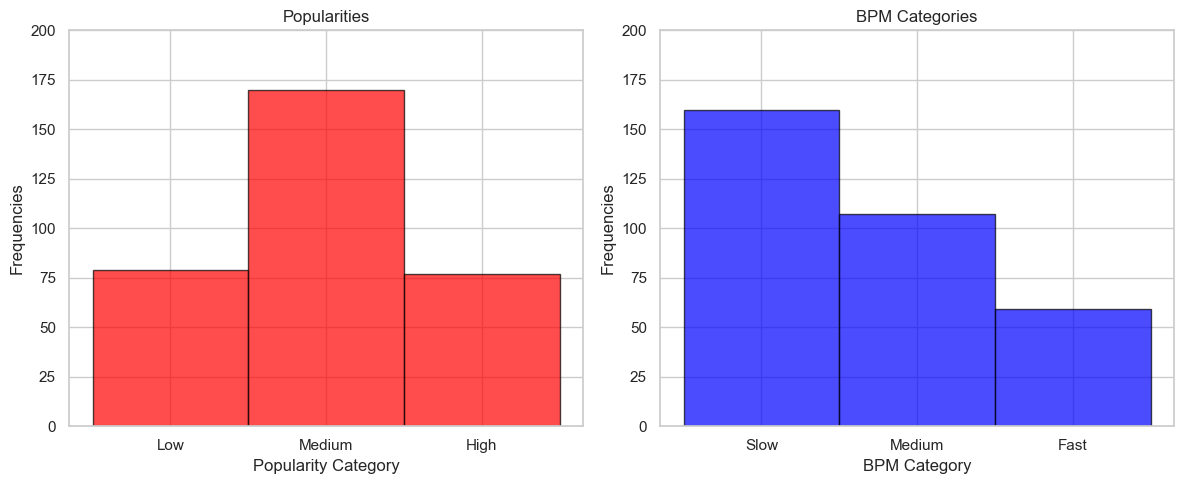

In [79]:
# Define the order for Popularity Categories and BPM Categories
popularity_order = ['Low', 'Medium', 'High']
bpm_order = ['Slow', 'Medium', 'Fast']

# Create a subplot matrix (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for 'Popularity_Category' in the first subplot
axs[0].hist(df['Popularity_Category'], bins=[0, 1, 2, 3], color='red', edgecolor='black', alpha=0.7, align='mid')
axs[0].set_title('Popularities')
axs[0].set_ylabel('Frequencies')
axs[0].set_xlabel('Popularity Category')
axs[0].set_xticks([0.5, 1.5, 2.5])
axs[0].set_xticklabels(popularity_order)
axs[0].set_ylim(0, 200)

# Plot histogram for 'BPM_Category' in the second subplot
axs[1].hist(df['BPM_Category'], bins=[0, 1, 2, 3], color='blue', edgecolor='black', alpha=0.7, align='mid')
axs[1].set_title('BPM Categories')
axs[1].set_ylabel('Frequencies')
axs[1].set_xlabel('BPM Category')
axs[1].set_xticks([0.5, 1.5, 2.5])
axs[1].set_xticklabels(bpm_order)
axs[1].set_ylim(0, 200)

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()


Now let's do some bi-variate analysis. If we want to plot the relationship between Energy and Loudness, think that which plot would be the appropriate choice.

Visualize the relationship between the two according to the plot you choose. Loudness bounds must be -2-20 and energy limits must be 0-100. 

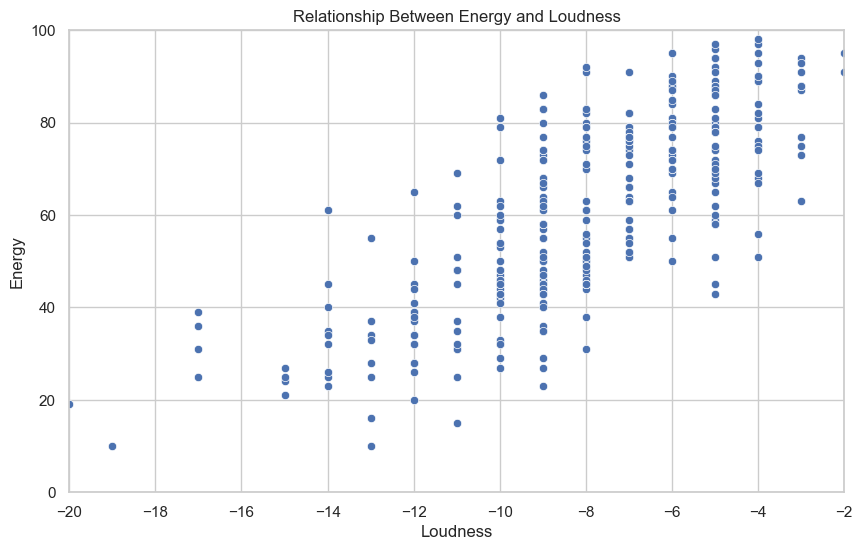

In [80]:
df = pd.DataFrame(allSongs)

# Convert 'Loud' column to string before stripping
df['Loud'] = df['Loud'].astype(str).str.strip()

# Extract the numeric part and convert it to integer for each element in the 'Loud' column
df['Loud'] = pd.to_numeric(df['Loud'].str[:-3], errors='coerce')

# Convert 'Energy' column to integer
df['Energy'] = df['Energy'].astype(int)

# Set up the scientific notation for the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Loud', y='Energy', data=df)

# Set axis limits
plt.xlim(-20, -2)
plt.ylim(0, 100)

# Set axis labels and title
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.title('Relationship Between Energy and Loudness')

# Show the plot
plt.grid(True)
plt.show()


Now, create the plot which displays the average popularity of music albums over the years, with each data point representing a year, you can use a line graph with markers, and includes labels and appropriate y-limits ( It must be 5 units below the minimum popularity and 5 units above the maximum popularity.)  You can also rotate the x tick values ​​by 45 degrees. 


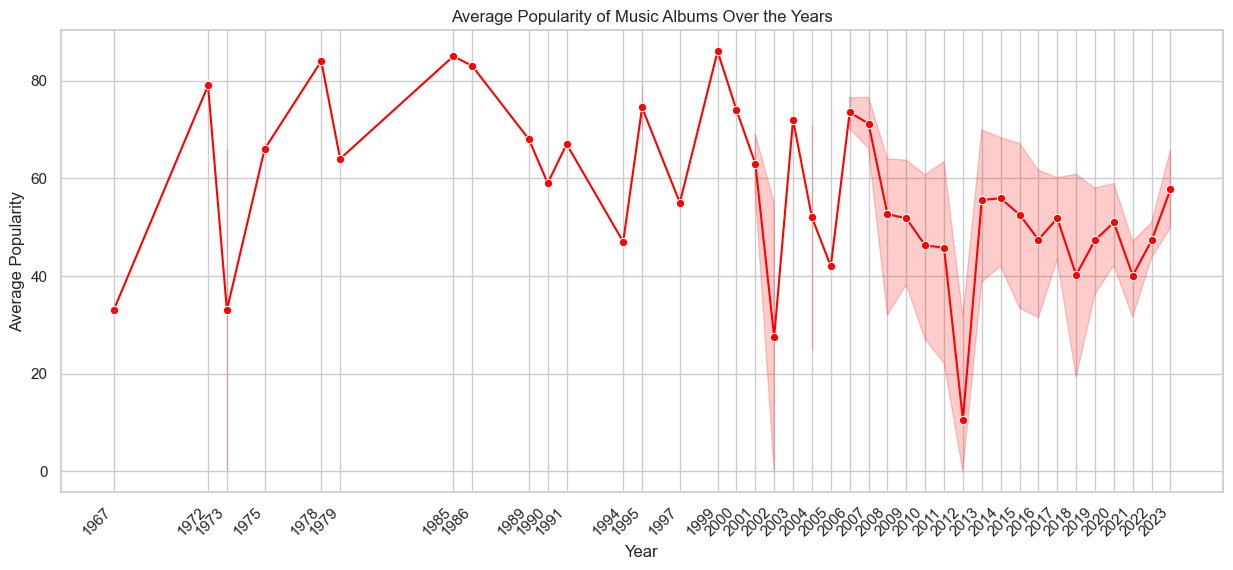

In [81]:
# Convert 'Album Date' to integer 'Year' column (assuming 'Album Date' is in the format 'yyyy-mm-dd')
df['Album Date'] = df['Album Date'].astype(str).str.split('-').str[0]
df['Album Date'] = df['Album Date'].astype(int)
df['Popularity'] = df['Popularity'].astype(int)


# Set up the plot
plt.figure(figsize=(15, 6))

# Plot a line graph with markers
sns.lineplot(x='Album Date', y='Popularity', data=df, marker='o', color='red')

# Ensure all years are included in the x-axis
plt.xticks(df['Album Date'].unique(), rotation=45, ha='right')

# Set axis labels and title
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.title('Average Popularity of Music Albums Over the Years')

# Show the plot
plt.grid(True)
plt.show()


Now, let's create a plot that illustrates the average popularity of music albums across the months of the year. The plot should be in the form of a line graph with markers, with the x-axis representing the months (in a custom order from January to December) and the y-axis representing the average popularity. Make sure to include appropriate labels and set the y-axis limits to be 5 units below the minimum popularity and 5 units above the maximum popularity. Additionally, rotate the x-axis tick values by 45 degrees for better readability. 

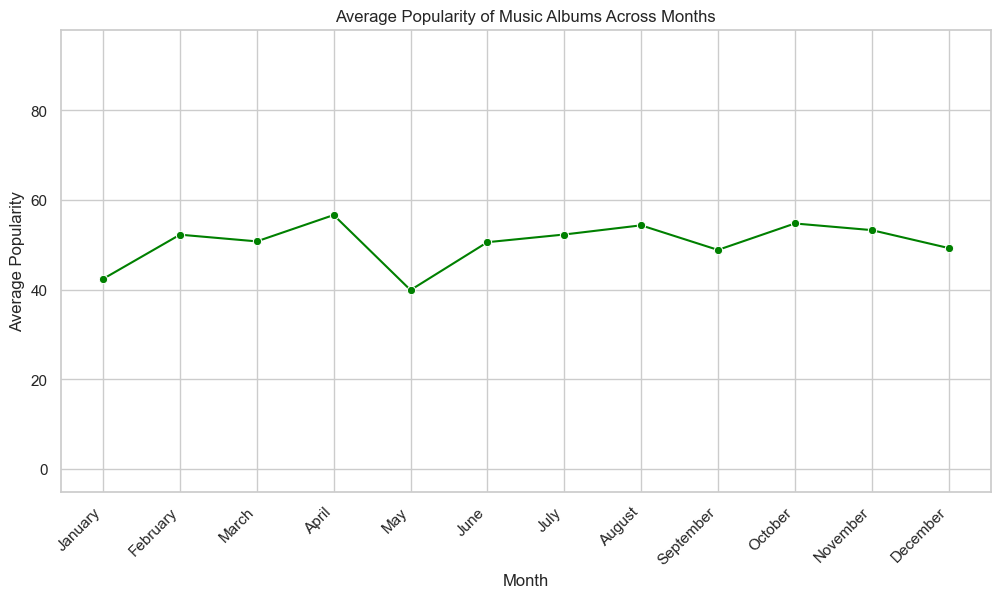

In [82]:
df = pd.DataFrame(allSongs)

df['Popularity'] = df['Popularity'].astype(int)

# Replace '00' in the day and month components with '01'
df['Album Date'] = df['Album Date'].replace({'-00-': '-01-', '-00': '-01'})

# Convert 'Album Date' to a datetime column
df['Album Date'] = pd.to_datetime(df['Album Date'], errors='coerce')

# Extract month from 'Album Date'
df['Month'] = df['Album Date'].dt.month_name()

# Set a custom order for months
custom_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Manually order the months in the DataFrame
df['Month'] = pd.Categorical(df['Month'], categories=custom_order, ordered=True)

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot a line graph with markers
sns.lineplot(x='Month', y='Popularity', data=df.sort_values('Month'), marker='o', errorbar=None, color='green')

# Rotate x-axis tick labels by 45 degrees for better readability
plt.xticks(rotation=45, ha='right')

# Set y-axis limits
min_popularity = df['Popularity'].min() - 5
max_popularity = df['Popularity'].max() + 5
plt.ylim(min_popularity, max_popularity)

# Set axis labels and title
plt.xlabel('Month')
plt.ylabel('Average Popularity')
plt.title('Average Popularity of Music Albums Across Months')

# Show the plot
plt.grid(True)
plt.show()


Let's create more sophisticated plot. In this question you will also make some operations on the dataset again.

Visualize and compare the BPM (Beats Per Minute) levels in the music of four different artists: Lorde, Big Thief, Wolf Alice and Phoebe Bridgers. The data is presented in a countplot with three categories for BPM levels: Slow, Medium, and Fast. Each artist's contribution to each BPM category is shown using a different color. The y-axis represents the frequency of songs falling into each BPM category. Set the y-axis limits to a range of 0 to 10 for better clarity.

You already see the answer below as an example, you can use inferno as the color code. There may be slight differences in styling, but we expect a very similar answer. Please be careful with the order of x-axis.


<img src="https://i.imgur.com/EAk2mcB.png" alt="barplot-210" border="0" width="500">


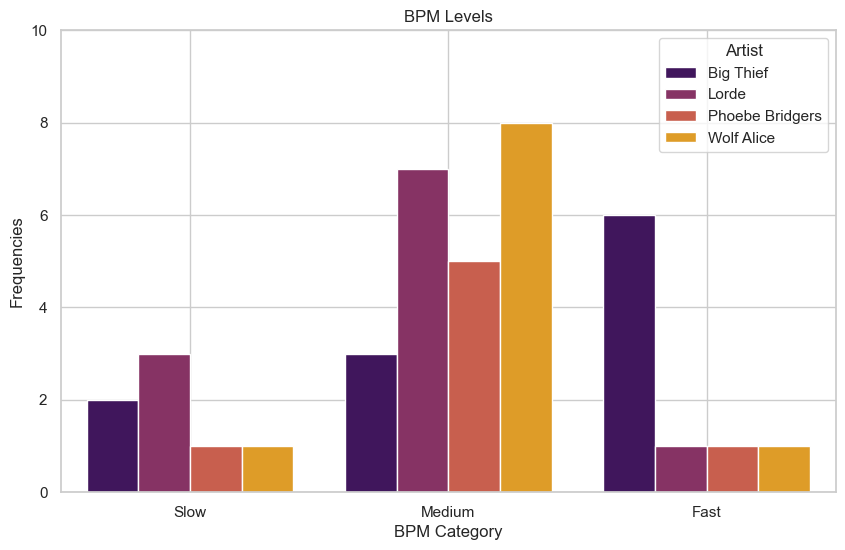

In [83]:
df = pd.DataFrame(allSongs)

# Define the order of BPM categories and artists
bpm_order = ['Slow', 'Medium', 'Fast']
artist_order = ['Big Thief', 'Lorde', 'Phoebe Bridgers', 'Wolf Alice']

# Filter data for the specified artists
df_selected = df[df['Artist'].isin(artist_order)]

# Set up the plot
plt.figure(figsize=(10, 6))

# Create a countplot with specified order
sns.countplot(x='BPM_Category', hue='Artist', data=df_selected, palette='inferno', order=bpm_order, hue_order=artist_order)

# Set y-axis limits for better clarity
plt.ylim(0, 10)

# Set axis labels and title
plt.xlabel('BPM Category')
plt.ylabel('Frequencies')
plt.title('BPM Levels')

# Show the plot
plt.legend(title='Artist')
plt.grid(True)
plt.show()


We are approaching the end. Visualize the aggregated Energy and Acoustic values of songs categorized by the top 10 most common genres in the dataset.

The final visualization should be a stacked bar chart where each bar represents one of the top 10 genres, and the height of the colored segments within each bar denotes the sum of Energy and Acoustic values for songs in that genre. This allows for a quick comparative view of how energetic or acoustic songs from each of the top genres tend to be.

You already see the answer below as an example, you can use ['#669bbc', '#003049'] colors. There may be slight differences in styling, but we expect a very similar answer.


<img src="https://i.imgur.com/eM0q688.png" alt="barplot-210" border="0" width="500">


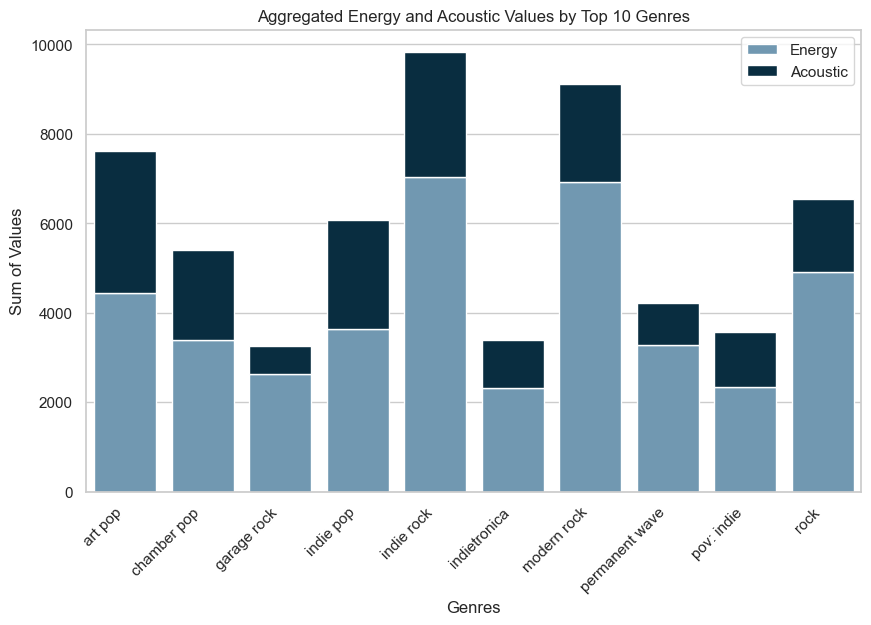

Index(['indie rock', 'modern rock', 'art pop', 'rock', 'indie pop',
       'chamber pop', 'permanent wave', 'pov: indie', 'indietronica',
       'garage rock'],
      dtype='object', name='Genres')


In [84]:
# Get the top 10 most common genres
top_genres = df['Genres'].str.split(',').explode().str.strip().value_counts().head(10).index

# Create dictionaries to store aggregated energy and acoustic values for each genre
genre_energy = {genre: 0 for genre in top_genres}
genre_acoustic = {genre: 0 for genre in top_genres}

# Iterate through the DataFrame
for index, row in df.iterrows():
    # Split genres and convert energy and acoustic values to numeric
    genres = row['Genres'].split(',')
    for j in genres:
        genres[genres.index(j)] = j.strip()
    energy = pd.to_numeric(row['Energy'], errors='coerce')
    acoustic = pd.to_numeric(row['Acoustic'], errors='coerce')
    
    # Update dictionaries for each genre
    for genre in genres:
        if genre in top_genres:
            genre_energy[genre] += energy
            genre_acoustic[genre] += acoustic

# Create a DataFrame from the dictionaries
df_genre_agg = pd.DataFrame({'Genres': list(top_genres), 'Energy': list(genre_energy.values()), 'Acoustic': list(genre_acoustic.values())})

# Order genres alphabetically
df_genre_agg = df_genre_agg.sort_values(by='Genres')

# Set up the stacked bar chart
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot the stacked bar chart
sns.barplot(x='Genres', y='Energy', data=df_genre_agg, color='#669bbc', label='Energy')
sns.barplot(x='Genres', y='Acoustic', data=df_genre_agg, color='#003049', label='Acoustic', bottom=df_genre_agg['Energy'])

# Customize the plot
plt.title('Aggregated Energy and Acoustic Values by Top 10 Genres')
plt.xlabel('Genres')
plt.ylabel('Sum of Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend()

# Show the plot
plt.show()

print(top_genres)


Now, show the correlations of numerical columns in a heatmap, don't forget that you must only use numerical columns. You can use inferno as a color map.

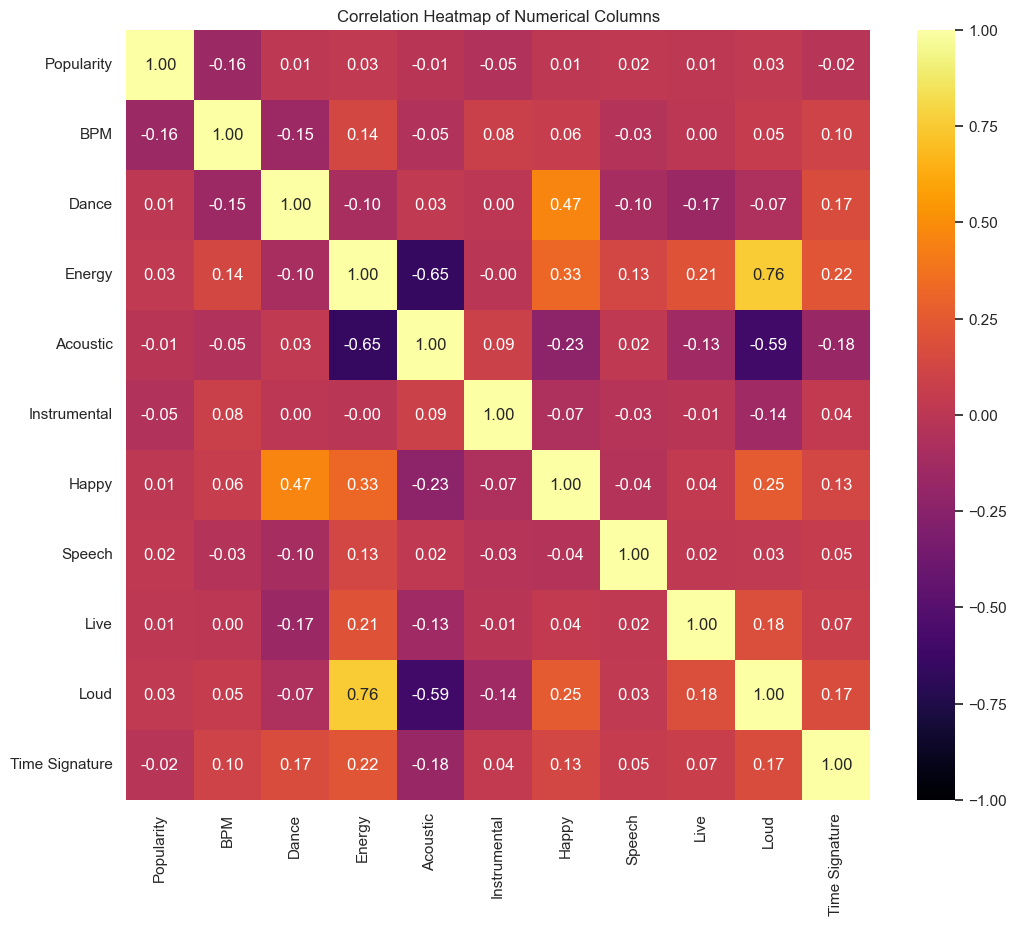

In [85]:
# Select the relevant numerical columns
numerical_columns = [
    'Popularity', 'BPM', 'Dance', 'Energy', 'Acoustic',
    'Instrumental', 'Happy', 'Speech', 'Live', 'Loud',
    'Time Signature'  # Added 'Time Signature' column
]

# Create a DataFrame containing only the numerical columns
df_numerical = df[numerical_columns]

# Use .loc to modify the 'Loud' column
df_numerical.loc[:, 'Loud'] = df_numerical['Loud'].str[:-3].astype(float)

# Calculate the correlation matrix for numerical columns
correlation_matrix = df_numerical.corr()

# Set up the plot
plt.figure(figsize=(12, 10))

# Create a heatmap with the 'inferno' color map
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt=".2f", vmin=-1, vmax=1)

# Set the title
plt.title('Correlation Heatmap of Numerical Columns')

# Show the plot
plt.show()


And we will conclude the assignment with a simple question. Though this question isn't directly related to visualization, you must retrieve and print the HTML content of the chat URL you used in ChatGPT using BeautifulSoup. 

In [ ]:
import bs4
!jupyter notebook --generate-config



# Load the HTML file
file_path = 'chatGpt.html'
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# Create a BeautifulSoup object
soup = bs4.BeautifulSoup(html_content, 'html.parser')

# Print the prettified HTML content
print(soup.prettify())



Overwrite /Users/fipek/.jupyter/jupyter_notebook_config.py with default config? [y/N]

Congratulations! You've reached the end of your assignment. In this assignment, we dealt with data questions about albums, artists, and many music related data over Spotify data. I hope it has been a fun process.

**If you want to listen to the playlist we analyzed:**
https://open.spotify.com/playlist/4wyQnWDDys6T8A2ni96VfG?si=1c69c078d81f47f5

See you later!
    
<img src="https://i.imgur.com/KSbQFe7.png" alt="barplot-210" border="0" width="300">

***dall-e prompt***: an oil painting of data science student does homework in pain

